In [4]:
# from multirnn import MultiRNN
import pandas as pd

In [6]:
df = pd.read_csv("../data/energydata_complete.csv", index_col=0, parse_dates=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
# scaling
from sklearn.preprocessing import MinMaxScaler

pd.DataFrame(df, columns=df.columns).describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
df.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

In [10]:
# train test split
train = pd.DataFrame(df, index=df.index, columns=df.columns).loc[:"2016-03-30 23:50:00"]
train.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-03-30 23:10:00,60,0,22.600000,39.163333,20.230000,41.290000,22.5,38.26,21.200000,40.29,...,20.2,39.400000,6.75,754.3,91.666667,2.666667,37.833333,5.45,5.195469,5.195469
2016-03-30 23:20:00,60,0,22.533333,39.090000,20.200000,41.290000,22.5,38.29,21.200000,40.29,...,20.2,39.526667,6.70,754.3,92.333333,2.333333,35.666667,5.50,22.293476,22.293476
2016-03-30 23:30:00,60,0,22.500000,39.090000,20.133333,41.363333,22.5,38.29,21.166667,40.20,...,20.2,39.826667,6.65,754.3,93.000000,2.000000,33.500000,5.55,47.405279,47.405279
2016-03-30 23:40:00,50,0,22.500000,39.090000,20.100000,41.400000,22.5,38.29,21.100000,40.20,...,20.2,39.966667,6.60,754.3,93.666667,1.666667,31.333333,5.60,13.876369,13.876369
2016-03-30 23:50:00,50,0,22.463333,39.090000,20.033333,41.400000,22.5,38.29,21.100000,40.09,...,20.2,40.145000,6.55,754.3,94.333333,1.333333,29.166667,5.65,21.498000,21.498000


In [11]:
test = pd.DataFrame(df, index=df.index, columns=df.columns).loc["2016-05-01 00:00:00":]
test.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.2000,18.390000,41.40,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.1725,18.390000,41.50,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.0900,18.323333,41.50,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.0900,18.290000,41.50,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.0300,18.290000,41.56,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441


In [12]:
test.index

DatetimeIndex(['2016-05-01 00:00:00', '2016-05-01 00:10:00',
               '2016-05-01 00:20:00', '2016-05-01 00:30:00',
               '2016-05-01 00:40:00', '2016-05-01 00:50:00',
               '2016-05-01 01:00:00', '2016-05-01 01:10:00',
               '2016-05-01 01:20:00', '2016-05-01 01:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=3853, freq=None)

In [13]:
# create datasets, one for each column,
# keep the index.

# create dict to store datasets
datasets = {
    "train" : {col:train[col] for col in train.columns},
    "test" : {col:test[col] for col in test.columns}
}

datasets["train"].keys() # same as df.columns

dict_keys(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'])

In [14]:
scaler = MinMaxScaler()
scaled_lights_train = scaler.fit_transform(datasets["train"]["lights"].values.reshape(-1, 1))
scaled_lights_test = scaler.transform(datasets["test"]["lights"].values.reshape(-1, 1))

In [15]:
pd.DataFrame(scaled_lights_train).tail()

,0
11413,0.0
11414,0.0
11415,0.0
11416,0.0
11417,0.0


In [16]:
pd.DataFrame(scaled_lights_train).head()

,0
0,0.428571
1,0.428571
2,0.428571
3,0.571429
4,0.571429


<Axes: xlabel='date'>

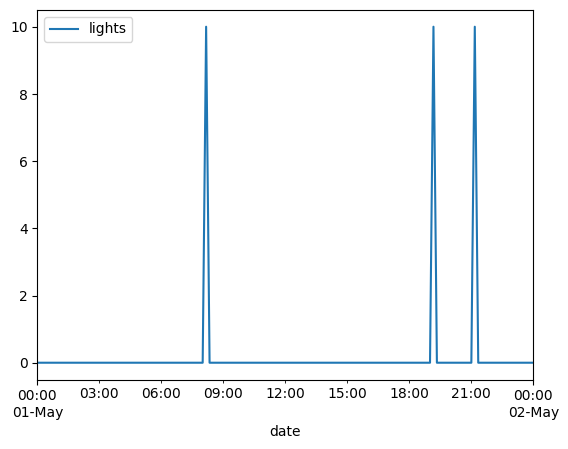

In [17]:
pd.DataFrame(datasets["test"]["lights"])[:145].plot()

<Axes: xlabel='date'>

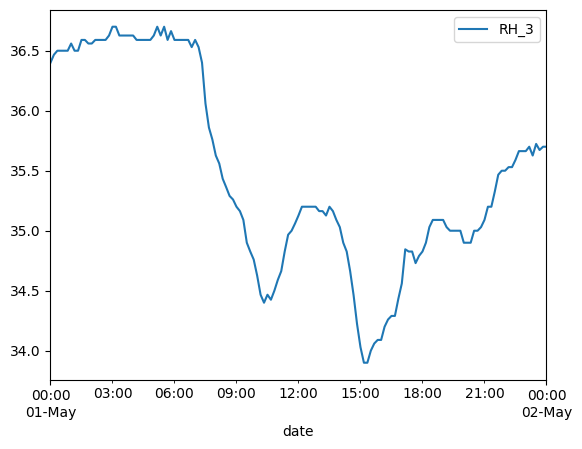

In [20]:
pd.DataFrame(datasets["test"]["RH_3"])[:145].plot()

In [13]:
# create timeseriesgenerator
from keras.preprocessing.sequence import TimeseriesGenerator

# in this case, we are trying to forecast the next 2 days, ie 288 steps
length = 288
batch_size = 30
epochs = 20

nn_params = {"units" : length + 1,
             "activation" : "relu",
             "input_shape" : (length, 1),
             "optimizer" : "adam",
             "loss" : "mse"}

2024-05-13 15:29:52.278844: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 15:29:52.278866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 15:29:52.279446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-13 15:29:52.283879: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
scaled_lights_train.min(), scaled_lights_train.max()

(0.0, 1.0)

In [15]:
train_lights_generator = TimeseriesGenerator(scaled_lights_train, 
                                             scaled_lights_train, 
                                             length=length, batch_size=batch_size)

train_lights_X, train_lights_y = train_lights_generator[0]

print(f"For array : \n{train_lights_X.flatten()}")
print(f"Predict this y : {train_lights_y}")

For array : 
[0.42857143 0.42857143 0.42857143 ... 0.         0.         0.        ]
Predict this y : [[0.        ]
 [0.14285714]
 [0.        ]
 [0.        ]
 [0.14285714]
 [0.        ]
 [0.14285714]
 [0.        ]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.14285714]
 [0.        ]
 [0.14285714]
 [0.28571429]
 [0.28571429]
 [0.28571429]
 [0.42857143]
 [0.28571429]
 [0.28571429]
 [0.28571429]
 [0.28571429]
 [0.28571429]
 [0.28571429]
 [0.28571429]
 [0.14285714]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [16]:
# create model
from keras.models import Sequential
from keras.layers import LSTM, Dense

lights_model = Sequential()
lights_model.add(LSTM(units=nn_params["units"],
                      activation=nn_params["activation"],
                      input_shape=nn_params["input_shape"]))
lights_model.add(Dense(units=1)) # output layer
lights_model.compile(optimizer=nn_params["optimizer"], loss=nn_params["loss"])
lights_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 289)               336396    
                                                                 
 dense (Dense)               (None, 1)                 290       
                                                                 
Total params: 336686 (1.28 MB)
Trainable params: 336686 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)


2024-05-13 15:29:53.586838: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 15:29:53.614442: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 15:29:53.614603: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

_________________________________________________________________


In [17]:
# early stopping
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=4)

In [18]:
# create validation generator
val_lights_gen = TimeseriesGenerator(scaled_lights_test,
                                     scaled_lights_test,
                                     length=length, batch_size=batch_size)

In [19]:
# fit or train the model
light_res = lights_model.fit(train_lights_generator,
                             validation_data=val_lights_gen,
                             epochs=epochs,
                             callbacks=[early_stop],
                             batch_size=batch_size)

Epoch 1/20


2024-05-13 15:29:55.348151: I external/local_xla/xla/service/service.cc:168] XLA service 0x727c25b497c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-13 15:29:55.348173: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-05-13 15:29:55.353226: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-13 15:29:55.367766: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1715606995.442436  390317 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


371/371 [==============================] - 57s 150ms/step - loss: 0.0075 - val_loss: 0.0031
Epoch 2/20
371/371 [==============================] - 55s 149ms/step - loss: 0.0057 - val_loss: 0.0026
Epoch 3/20
371/371 [==============================] - 56s 150ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 4/20
371/371 [==============================] - 55s 149ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 5/20
371/371 [==============================] - 55s 149ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 6/20
371/371 [==============================] - 55s 149ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 7/20
371/371 [==============================] - 56s 150ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 8/20
371/371 [==============================] - 55s 149ms/step - loss: 0.0054 - val_loss: 0.0025
Epoch 9/20
371/371 [==============================] - 56s 150ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 10/20
371/371 [==============================] - 56s 150ms/step - loss: 0.0053

<Axes: >

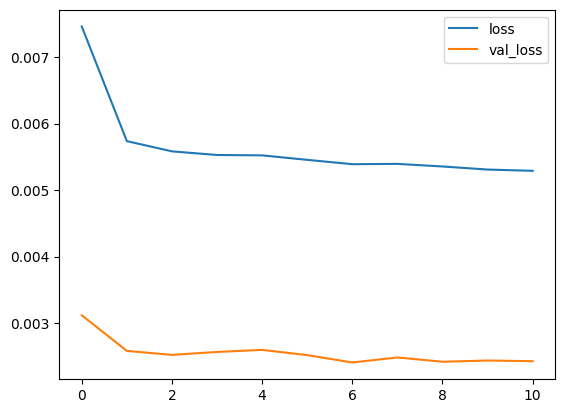

In [20]:
# plot the loss
losses = pd.DataFrame(light_res.history)
losses.plot()

In [21]:
# evaluate on test data
first_eval_batch = scaled_lights_train[-length:]
first_eval_batch = first_eval_batch.reshape((1, length, 1))
lights_model.predict(first_eval_batch)

1/1 [==============================] - 0s 150ms/step


array([[0.02442152]], dtype=float32)

In [22]:
# create test predictions
import numpy as np

test_predictions = []
first_eval_batch = scaled_lights_train[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(scaled_lights_test)):
    current_pred = lights_model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 45ms/step


In [23]:
test_predictions

[array([0.02442152], dtype=float32),
 array([0.02519416], dtype=float32),
 array([0.02506874], dtype=float32),
 array([0.02439668], dtype=float32),
 array([0.02346587], dtype=float32),
 array([0.02243556], dtype=float32),
 array([0.02142369], dtype=float32),
 array([0.02049103], dtype=float32),
 array([0.01967161], dtype=float32),
 array([0.01897922], dtype=float32),
 array([0.01841005], dtype=float32),
 array([0.01795316], dtype=float32),
 array([0.01759343], dtype=float32),
 array([0.01731459], dtype=float32),
 array([0.0171013], dtype=float32),
 array([0.01694002], dtype=float32),
 array([0.01681957], dtype=float32),
 array([0.01673049], dtype=float32),
 array([0.01666516], dtype=float32),
 array([0.01661758], dtype=float32),
 array([0.01658317], dtype=float32),
 array([0.01655841], dtype=float32),
 array([0.0165407], dtype=float32),
 array([0.01652808], dtype=float32),
 array([0.01651913], dtype=float32),
 array([0.0165128], dtype=float32),
 array([0.01650834], dtype=float32),
 arr

In [24]:
# get true predictions by inverting the scaling
# scaler = MinMaxScaler()
# scaled_train = scaler.fit_transform(scaled_lights_train.reshape(-1, 1))
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[1.7095067 ],
       [1.76359098],
       [1.75481163],
       ...,
       [1.15485305],
       [1.15485305],
       [1.15485305]])

In [25]:
test_df = pd.DataFrame(datasets["test"]["lights"].values, columns=["True Light"])
test_df["Predicted Light"] = true_predictions
test_df.head()

,True Light,Predicted Light
0,0,1.709507
1,0,1.763591
2,0,1.754812
3,0,1.707768
4,0,1.642611


In [26]:
test_df.tail()

,True Light,Predicted Light
3848,0,1.154853
3849,0,1.154853
3850,10,1.154853
3851,10,1.154853
3852,10,1.154853


<Axes: >

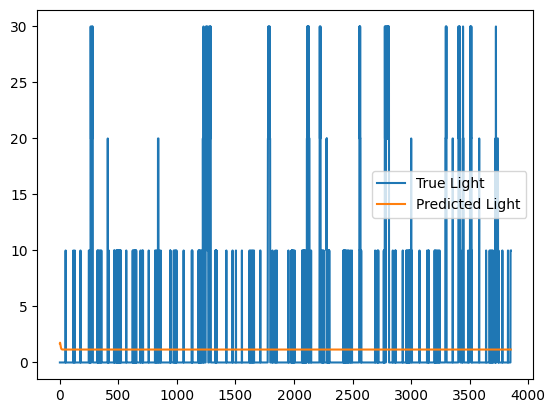

In [27]:
test_df.plot()

In [28]:
# at the moment, we have a possible issue with the scaling,
# Approach: similar to when we created df's for each column,
# we can create dict for to store a scaler for each sub-df,
# meaning we can scale each column independently, which will
# make it easier to invert the scaling, and plot.

# WHAT TO DO NOW:
# 1. create a new notebook and do everything from scratch
# copy as much as possible from notebook "realdata.ipynb"
# 2. create a function where parameters such as indices,
# batch_size etc.

In [29]:
# multi = MultiRNN(dataset=df, test=None, train=None,
#                  length=None, LSTM_units=None, activation=None,
#                  optimizer=None, batch_size=None, epochs=None)